In [1]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
FOLDERS = ["approach1", "approach2"]

In [4]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  41
Number of input variables:  5
Number of output variables:  3

approach1/:

Container_DataLayout:
Train: 0.9976833869714793
Test: 0.9976661480328962

Traversal:
Train: 0.7480310713129787
Test: 0.7507824441371279

Newton 3:
Train: 0.9651295806871524
Test: 0.9622285174693107


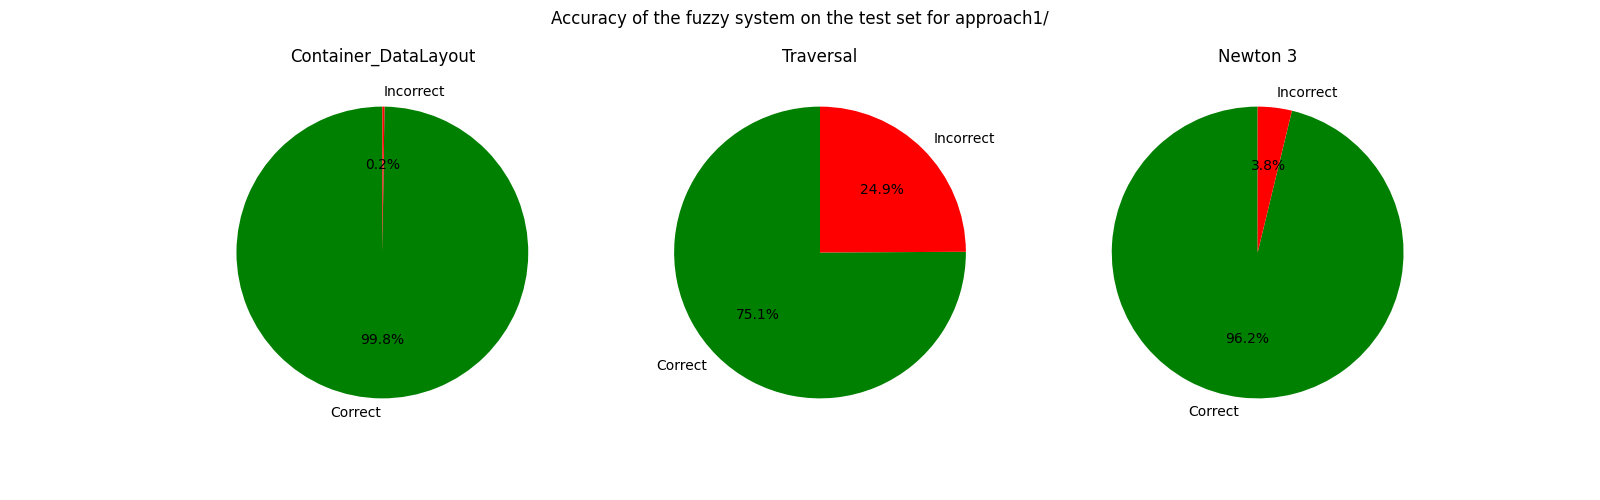

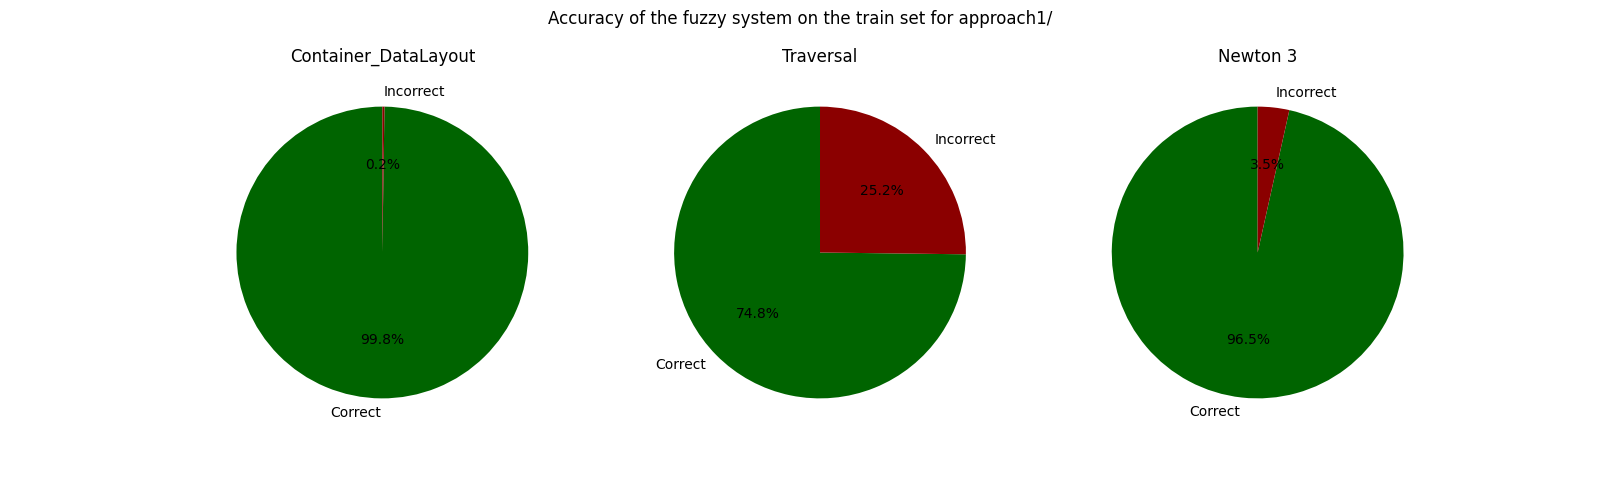

Number of rules:  41
Number of input variables:  5
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.9976292978067368
Test: 0.9975538730343623

Traversal:


In [5]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1, n=600)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1, n=600)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

Union:  "("("("("("("("("("("("("("("("("("("(Traversal is "vcl_sliced_c02": Gaussian(9.777777777777777, 0.0522875816993464))↑0.00" or "(Traversal is "vcl_cluster_iteration": Gaussian(7.111111111111111, 0.0522875816993464))↑0.33")" or "(Traversal is "vcl_sliced_balanced": Gaussian(8.88888888888889, 0.0522875816993464))↑0.08")" or "(Traversal is "vlp_c18": Gaussian(12.444444444444443, 0.0522875816993464))↑0.00")" or "(Traversal is "lc_sliced_c02": Gaussian(3.5555555555555554, 0.0522875816993464))↑0.00")" or "(Traversal is "lc_c01": Gaussian(0.8888888888888888, 0.0522875816993464))↑0.00")" or "(Traversal is "lc_c08": Gaussian(1.7777777777777777, 0.0522875816993464))↑0.39")" or "(Traversal is "lc_sliced_c02": Gaussian(3.5555555555555554, 0.0522875816993464))↑0.61")" or "(Traversal is "lc_c18": Gaussian(2.6666666666666665, 0.0522875816993464))↑0.39")" or "(Traversal is "vcl_c01_balanced, vcl_c06": Gaussian(5.333333333333333, 0.0522875816993464))↑0.00")" or "(Traversal is "vcl_sliced_c02": 

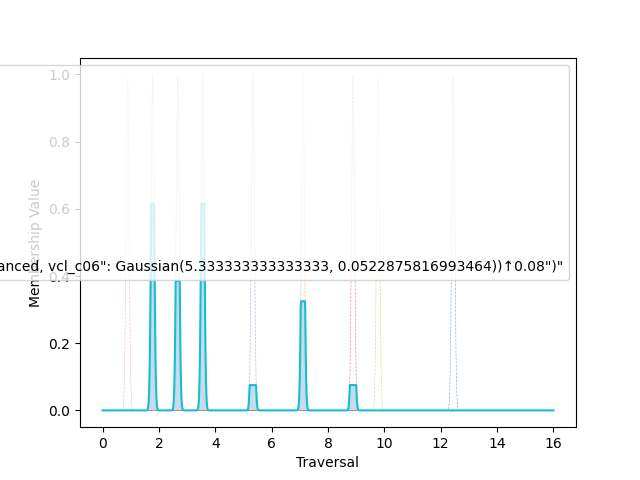

In [ ]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5,  "homogeneity": 0.5,
        "particlesPerCellStdDev": 1, "avgParticlesPerCell": 1.2}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000)

print("Union: ", union)

prediction = fiss["Traversal"].predictClosest(
    data, algo_ranking["Traversal"], n=600)[1]

print("Prediction: ", prediction)